### Instructions:

    1. Submit your python notebooks in zip format with naming convention as:
        
            RollNo1_RollNo2_RollNo3.zip
            
    2. Cheating of any form will not be tolerated.

Fill your Team details here.<br>
<br>
Format: Roll Number
 
         1.MT2018090
         2.MT2018116
         3.MT2018026

### Question: You need to build Logistic Regression from scratch using training set of Titanic dataset.

#### Instructions for each cell are provided, along with the marks they hold. Fill in the cells with your code

Import necessary packages.

In [5]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import time
import random
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc
# 1 Mark

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/shuvambosana/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Set seed value to 100.

In [6]:
# Set seed value to 100.
np.random.seed(100)
# 1 Mark

Load the "train.csv" dataset. You will be using the same file for sampling training and testing points.

In [7]:
# Load train.csv dataset
data=pd.read_csv("train.csv")
data.shape
data.loc[11]
# 2 Marks

PassengerId                          12
Survived                              1
Pclass                                1
Name           Bonnell, Miss. Elizabeth
Sex                              female
Age                                  58
SibSp                                 0
Parch                                 0
Ticket                           113783
Fare                              26.55
Cabin                              C103
Embarked                              S
Name: 11, dtype: object

Remove all missing rows and columns from the dataset.

In [8]:
# use dropna() to remove null values from data
newData=data.dropna()
newData.shape
# 1 Mark

(183, 12)

Select following features from dataset. <br>

        1. Sex
        2. Age
        3. Survived

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Select Sex, Age, Survived columns.
finalData=newData.drop(['PassengerId', 'Pclass', 'Name', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)
finalData.info()
# 1 Mark

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 3 columns):
Survived    183 non-null int64
Sex         183 non-null object
Age         183 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.7+ KB


The target variable to be predicted is whether a person will "survive" the Titanic tragedy or not.

Store the target 'Survived' in 'y' variable and other variables in 'X'.

In [11]:
# Store 'Survived' in y variable and other variables in X.
X = finalData.drop(['Survived'],axis=1)
y = finalData['Survived']
# X.info()
# y
# 2 Marks

The values in the 'Sex' column are 'Male/Female'. So convert them into 1/0 using Label Encoding.

In [12]:
le = LabelEncoder()

X['Sex'] = le.fit_transform(finalData.Sex) 

# 1 Mark

In [13]:
#X['Sex']

Split the dataset into train and test with a test size of 20% of total dataset.

In [14]:
# Split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

X_test['Sex'].value_counts

# 2 Marks

<bound method IndexOpsMixin.value_counts of 297    0
456    1
581    0
871    0
268    0
789    1
193    1
867    1
730    0
585    0
97     1
540    0
625    1
66     0
390    1
11     0
473    0
92     1
177    0
118    1
462    1
558    0
609    0
453    1
269    0
781    0
429    1
307    0
251    0
765    0
583    1
209    1
245    1
311    0
102    1
21     1
516    0
Name: Sex, dtype: int64>

In [15]:
X_train.shape

(146, 2)

In [16]:
_x_=np.array(X_train)
_ones = np.ones(X_train.shape[0])
_ones = _ones.reshape(-1, 1)
X_train = np.hstack([_ones,X_train])

In [17]:
_x_=np.array(X_test)
_ones = np.ones(X_test.shape[0])
_ones = _ones.reshape(-1, 1)
X_test = np.hstack([_ones,X_test])

In [18]:
X_train[0:10]

array([[ 1.,  1., 32.],
       [ 1.,  0., 18.],
       [ 1.,  0., 57.],
       [ 1.,  1., 48.],
       [ 1.,  0., 52.],
       [ 1.,  0., 50.],
       [ 1.,  0., 24.],
       [ 1.,  0., 49.],
       [ 1.,  1., 45.],
       [ 1.,  0., 35.]])

Convert X_train, y_train, X_test, y_test into numpy arrays.

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1,1)

X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1,1)



# 2 Marks

Define sigmoid function. <br>
        
           1. Input: An array.
           2. Output: Sigmoid of Input.

In [20]:
def sigmoid(z):
    return (1.0/(1+np.exp(-z)))
    
# 3 Marks

In [21]:
a=np.ones(2)
print(sigmoid(a))

[0.73105858 0.73105858]


Define loss function for logistic regression.

y is the label value

In [22]:
def loss(h, y):
    return np.mean((-1)*(y.T.dot(np.log(h))+(1-(y.T)).dot(np.log(1-h))))
# 3 Marks

Create a class for Logistic Regression function. <br>

            Input X, y, NumberOfIterations, LearningRate.
            Output: Updated weights.

In [23]:
def LogisticRegression(X, y, NumberOfIterations, threshold, LearningRate):        
   
    # Initialize weights randomly
    weights = np.array([np.random.rand(1),np.random.rand(1),np.random.rand(1)])
    #X_transpose=np.transpose(X)

    for i in range(NumberOfIterations):

        # Forward pass
        Z = np.dot(X,weights)
        A = sigmoid(Z)
        map(lambda x : 1 if x>=threshold else 0,A)
        #print(A.shape)
        # Loss Computation
        J = loss(A, y)
        #print(J)
        # Gradient computation
    #         dZ = A - y
        dZ = (np.dot(X.T,(A - y)) / y.shape[0])
        dweights = LearningRate * dZ

        # Update weights
        weights = weights - dweights

        # Printing loss after every 100 iterations
        if(i % 100 == 0):
            print('loss:' + str(J) + '\t')
    return weights

# 8 Marks

Define prediction function. <br>

        Input: X, threshold, weights.
        Output: Corresponding labels for data.

In [24]:
def predict(X, threshold, weights):
    print(weights.shape)
    print(X.shape)
    _y = np.dot(X,weights)
    print(_y)
    pr=np.array(sigmoid(_y))
    print(pr)
    res =[]
    for i in pr:
        if i>threshold:
            res.append(1)
        else:
            res.append(0)
    #map(lambda x : 1 if x>=threshold else 0,pr)
    print(res)
    return res
# 3 Marks

Call LogisticRegression function with following inputs to train on training set.

    1. X_train
    2. y_train
    3. NumberOfIterations = 1000
    4. LearningRate = 0.1

In [25]:
# Call  LogisticRegression function and store weights in model.
NumberOfIterations=1000
LearningRate=0.1
model = LogisticRegression(X_train,y_train,NumberOfIterations,0.5,LearningRate)
print(model)

loss:879.1407233480556	
loss:nan	
loss:nan	
loss:206.90566684795112	
loss:2188.5050585061445	
loss:701.1248705702527	
loss:1935.920599177792	
loss:480.15976480620776	
loss:nan	
loss:284.3336381746809	
[[ 5.89779354]
 [-7.78381277]
 [ 1.53262467]]


Make predictions on testing data. Store predictions in preds variable.

In [26]:
# Store predictions in preds variable.
threshold = 0.5
preds = predict(X_test,threshold,model)
#print(preds)
# 1 Mark

(3, 1)
(37, 3)
[[ 8.96304289]
 [97.73458463]
 [65.67015585]
 [77.93115325]
 [94.79002467]
 [68.61471581]
 [ 2.7118548 ]
 [45.62534569]
 [50.34390911]
 [33.48503768]
 [33.36434829]
 [61.07228183]
 [91.60408593]
 [50.34390911]
 [53.28846906]
 [94.79002467]
 [41.14816106]
 [68.61471581]
 [82.52902728]
 [34.89697297]
 [70.14734049]
 [65.67015585]
 [67.20278053]
 [73.21258984]
 [59.53965715]
 [31.95241301]
 [47.15797036]
 [31.95241301]
 [50.34390911]
 [84.06165195]
 [53.28846906]
 [59.41896776]
 [65.54946646]
 [33.48503768]
 [30.29909894]
 [50.22321971]
 [58.00703248]]
[[0.99987196]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.93772255]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.     

Compute the accuracy on test dataset given y_test (in the beginning)

In [27]:
#y_test preds
c = 0
for i in range(y_test.shape[0]):
    if (y_test[i] == preds[i]):
        c+=1;
Accuracy = (c*100)/y_test.shape[0]
Accuracy

# 1 Mark

64.86486486486487

In [30]:
y.shape

(183,)

What is the reason behind such low accuracy? What do you think are possible ways of improving it?

In [28]:
# 2 Marks for answering above question. Type out the answer below.
The reason for such a low accuracy is that we have discarded most of the attributes without suitable exploration of 
how it is correlated with the predication value,i.e.,'Survived' feature. Moreover due to discarding all the null values, 
our dataset has shrunk to almost one-third. So instead of dropping those values, we should have replaced it with suitable 
values rather than plainly discarding it.


SyntaxError: invalid syntax (<ipython-input-28-b940f7df8dcd>, line 2)

Type Here!

Plot ROC Curve for the model.

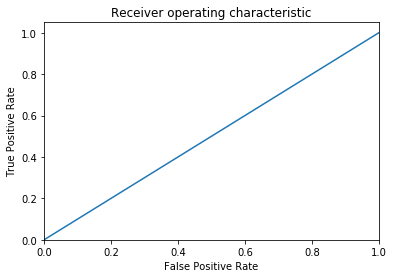

In [32]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, preds)
    roc_auc[i] = auc(fpr[i], tpr[i])

#print(roc_auc_score(y_test, preds))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
# 5 Marks